In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')




In [2]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv('matches.csv')

In [3]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [4]:
matches.shape

(1095, 20)

In [5]:
matches['team1'] = matches['team1'].replace({
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
})
matches['team2'] = matches['team2'].replace({
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
})
matches['team1'] = matches['team1'].replace({
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
})
matches['team2'] = matches['team2'].replace({
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
})


In [6]:
deliveries['batting_team']= deliveries['batting_team'].replace({
    'Rising Pune Supergiants': 'Rising Pune Supergiant'}
)
deliveries['bowling_team']= deliveries['bowling_team'].replace({
    'Rising Pune Supergiants': 'Rising Pune Supergiant'}
)
deliveries['batting_team']= deliveries['batting_team'].replace({
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'}
)
deliveries['bowling_team']= deliveries['bowling_team'].replace({
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'}
)


In [7]:
deliveries['batting_team']= deliveries['batting_team'].replace({
    'Royal Challengers Bengalore': 'Royal Challengers Bangalore'}
)
deliveries['bowling_team']= deliveries['bowling_team'].replace({
    'Royal Challengers Bengalore': 'Royal Challengers Bangalore'}
)

In [8]:
deliveries['bowling_team'].value_counts()

bowling_team
Mumbai Indians                 31505
Royal Challengers Bangalore    30159
Kolkata Knight Riders          29663
Chennai Super Kings            28576
Rajasthan Royals               26432
Kings XI Punjab                22483
Sunrisers Hyderabad            21717
Delhi Daredevils               18725
Delhi Capitals                 11216
Deccan Chargers                 9039
Punjab Kings                    6719
Pune Warriors                   5457
Gujarat Titans                  5301
Lucknow Super Giants            5226
Gujarat Lions                   3545
Rising Pune Supergiant          3543
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

In [9]:
matches['team1'] = matches['team1'].replace({
    'Royal Challengers Bengalore': 'Royal Challengers Bangalore'
})
matches['team2'] = matches['team2'].replace({
    'Royal Challengers Bengalore': 'Royal Challengers Bangalore'
})
matches['winner'] = matches['winner'].replace({
    'Royal Challengers Bengalore': 'Royal Challengers Bangalore'
})
matches['winner'] = matches['winner'].replace({
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
})
matches['winner'] = matches['winner'].replace({
     'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
})
matches['winner'] = matches['winner'].replace({
   'Rising Pune Supergiants': 'Rising Pune Supergiant'
})





In [10]:
matches['team1'].value_counts()

team1
Royal Challengers Bangalore    144
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Pune Warriors                   23
Lucknow Super Giants            23
Gujarat Titans                  21
Gujarat Lions                   16
Rising Pune Supergiant          14
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [11]:
matches['team2'].value_counts()

team2
Mumbai Indians                 138
Kolkata Knight Riders          130
Rajasthan Royals               120
Royal Challengers Bangalore    111
Chennai Super Kings            110
Kings XI Punjab                 98
Sunrisers Hyderabad             96
Delhi Daredevils                76
Delhi Capitals                  50
Deccan Chargers                 36
Punjab Kings                    25
Gujarat Titans                  24
Pune Warriors                   23
Lucknow Super Giants            21
Rising Pune Supergiant          16
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [12]:
  matches['city']=matches['city'].fillna('Unknown')

In [13]:
matches['method']=matches['method'].fillna('NON D/L ....NO RAIN AFFECT')

In [14]:
 success_ratio=matches.groupby('winner').count()['id']/matches.groupby('team1').count()['id']


In [15]:
success_ratio_sorted=success_ratio.sort_values(ascending=False)


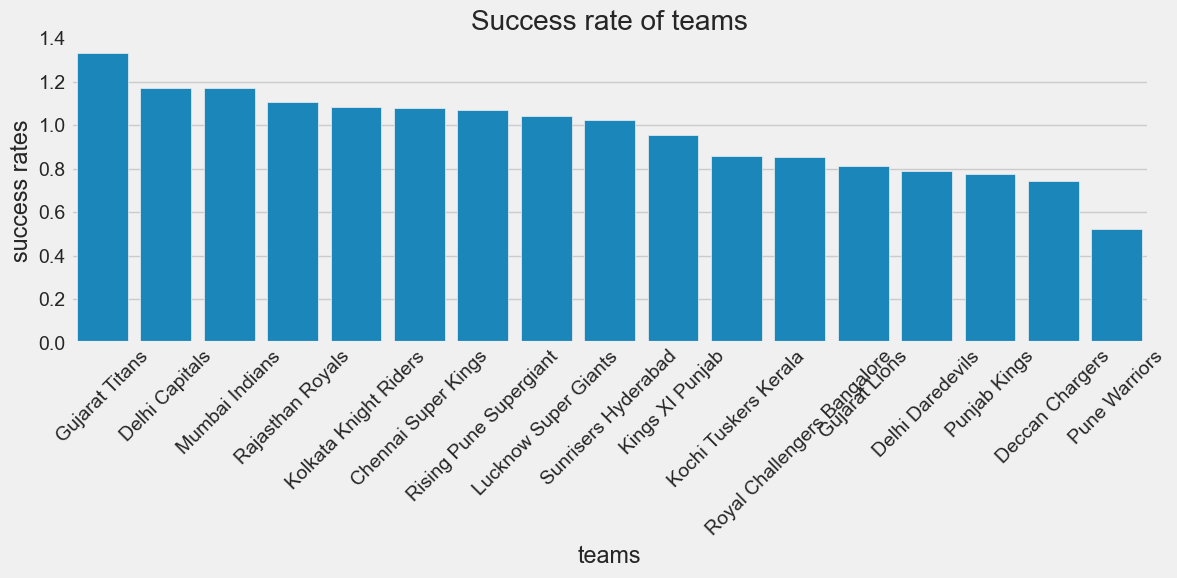

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x=success_ratio_sorted.index,y=success_ratio_sorted.values)
plt.title('Success rate of teams')
plt.xlabel('teams')
plt.ylabel('success rates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
winner_most=matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()

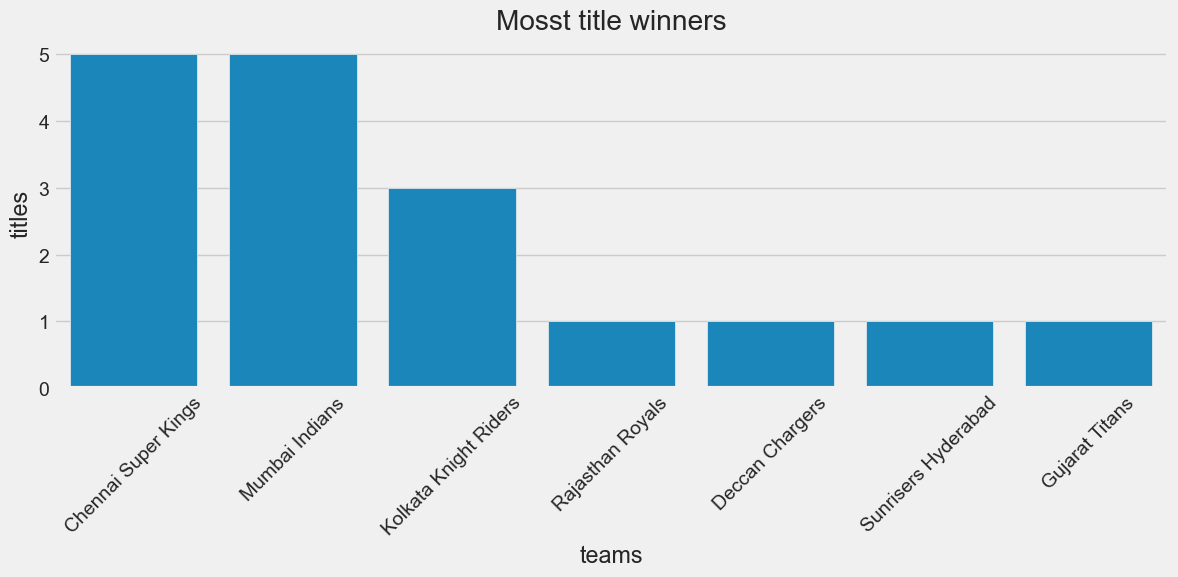

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x= winner_most.index,y=winner_most.values)
plt.title('Mosst title winners')
plt.xlabel('teams')
plt.ylabel('titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
batting_total=deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name='Runs')


In [20]:
top_batter_runs=batting_total.sort_values(by='Runs',ascending=False)[:10]

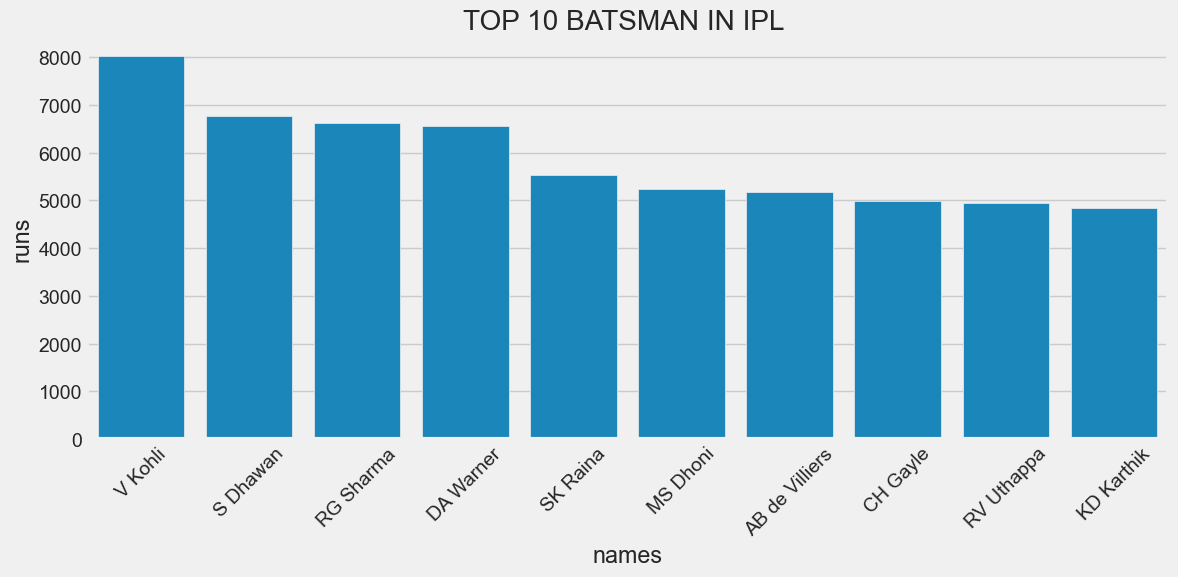

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x='batter',y='Runs',data=top_batter_runs)
plt.title('TOP 10 BATSMAN IN IPL ')
plt.xlabel('names')
plt.ylabel('runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
bating_innings=deliveries.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index(name='Innings runs')


In [23]:
batsman_best_innings_acc_to_runs=bating_innings.sort_values(by='Innings runs',ascending=False)

In [24]:
batsman_balls_faced=deliveries.groupby(['match_id','batter'])['ball'].count().reset_index(name='Bowls faced').sort_values(by='Bowls faced',ascending=False)

In [25]:
batsman_performance=pd.merge(batsman_best_innings_acc_to_runs,batsman_balls_faced,how='inner',on=['match_id','batter'])[:10]
batsman_performance['Strike rate for match']=np.round(batsman_performance['Innings runs']+100/batsman_performance['Bowls faced'],2)

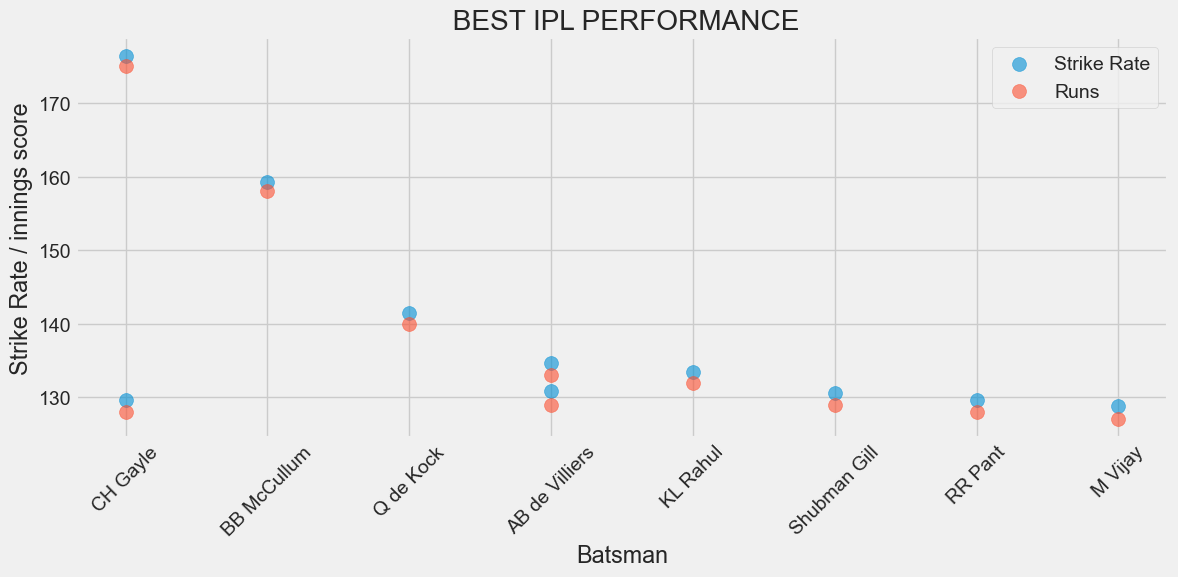

In [52]:
######DOUBT

plt.figure(figsize=(12,6))
plt.scatter(batsman_performance['batter'],batsman_performance['Strike rate for match'],label='Strike Rate',s=100,alpha=0.6)
plt.scatter(batsman_performance['batter'],batsman_performance['Innings runs'],label='Runs',s=100,alpha=0.6)
plt.title(' BEST IPL PERFORMANCE')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate / innings score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:


deliveries['dismissal_kind'] = deliveries['dismissal_kind'].replace({
   'retired hurt':'retired out'
})
deliveries['dismissal_kind'].value_counts()

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired out                18
hit wicket                 15
obstructing the field       3
Name: count, dtype: int64

In [28]:
exclude_wicks = ['run out', 'retired out', 'obstructing the field']

boweling_wicks=deliveries[~deliveries['dismissal_kind'].isin(exclude_wicks)]
most_wickets_ipl_top=boweling_wicks.groupby('bowler')['dismissal_kind'].count().reset_index(name='Wickets').sort_values(by='Wickets',ascending=False)[:10]

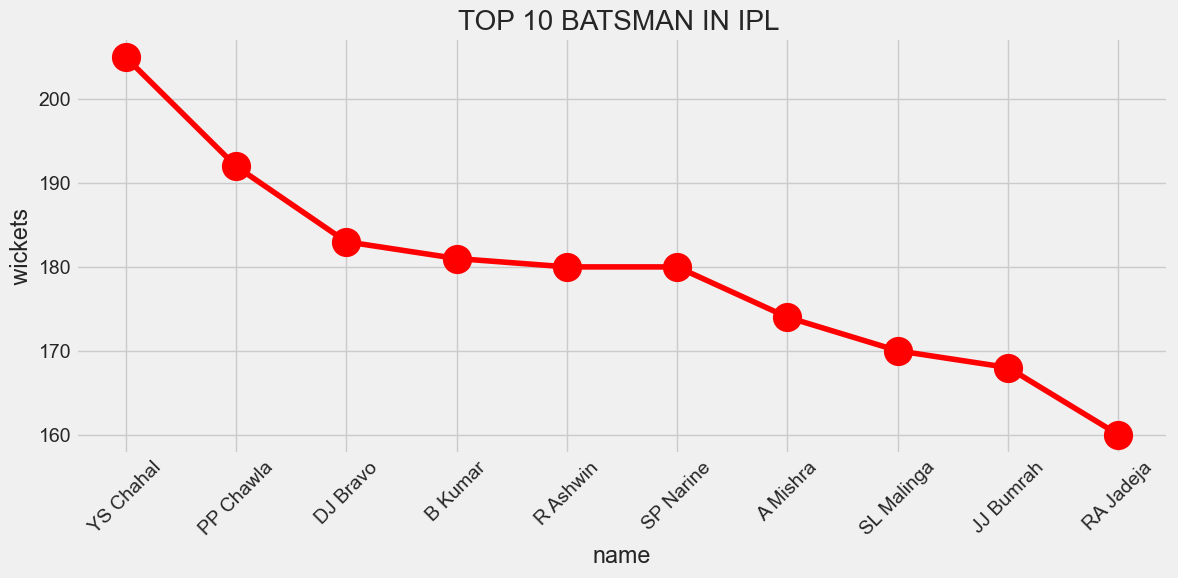

In [50]:
plt.figure(figsize=(12,6))
plt.plot(most_wickets_ipl_top['bowler'],most_wickets_ipl_top['Wickets'],marker='o',color='red',ms=20)
plt.title('TOP 10 BATSMAN IN IPL ')
plt.xlabel('name')
plt.ylabel(' wickets ')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#######top 10 bowling performance
match_bowling_top=boweling_wicks.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(name='Wickets').sort_values(by='Wickets',ascending=False)[:10]

In [37]:
match_bowler_runs_conceded=deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name='Runs Conceded')

In [41]:
match_bowler_performance=pd.merge(match_bowler_runs_conceded,match_bowling_top,how='inner',on=['match_id','bowler'])

In [42]:
match_bowler_performance['Runs per WICKET']=np.round(match_bowler_performance['Runs Conceded']/match_bowler_performance['Wickets'])

In [43]:
match_bowler_performance

,match_id,bowler,Runs Conceded,Wickets,Runs per WICKET
0,336005,Sohail Tanvir,15,6,2.0
1,501251,MM Patel,25,5,5.0
2,548311,RA Jadeja,16,5,3.0
3,548323,SP Narine,20,5,4.0
4,980979,A Zampa,19,6,3.0
5,1082609,B Kumar,20,5,4.0
6,1178394,AS Joseph,14,6,2.0
7,1254111,Arshdeep Singh,33,5,7.0
8,1359477,MA Wood,14,5,3.0
9,1422139,Yash Thakur,31,5,6.0


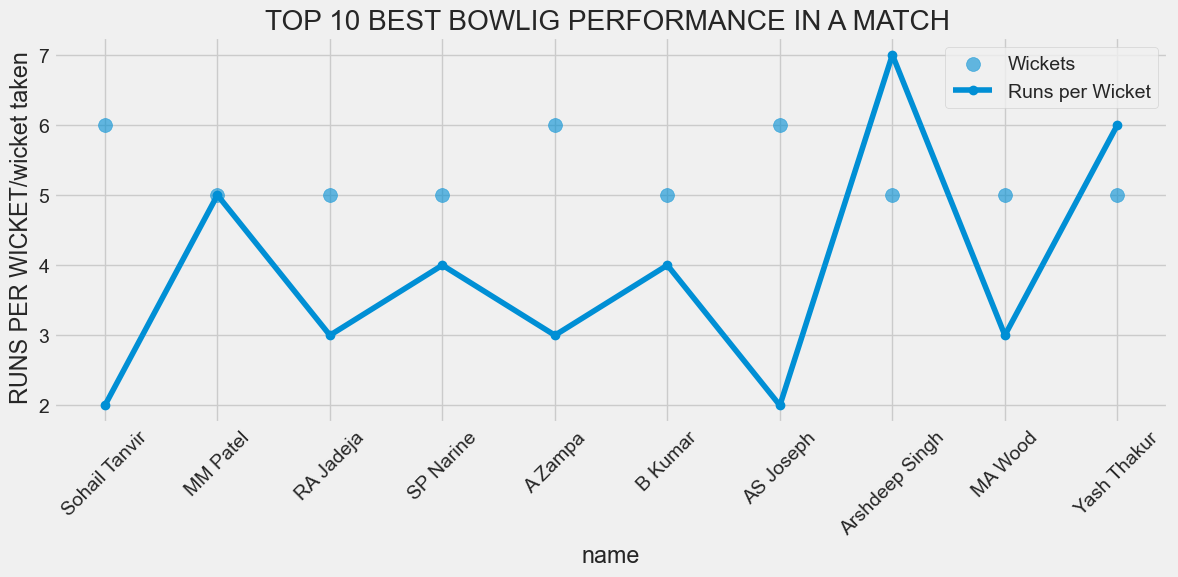

In [53]:
plt.figure(figsize=(12,6))
plt.scatter(match_bowler_performance['bowler'],match_bowler_performance['Wickets'],label='Wickets',s=100,alpha=0.6)
plt.plot(match_bowler_performance['bowler'],match_bowler_performance['Runs per WICKET'],marker='o',label='Runs per Wicket')
plt.title('TOP 10 BEST BOWLIG PERFORMANCE IN A MATCH ')
plt.xlabel('name')
plt.ylabel('  RUNS PER WICKET/wicket taken ')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NON D/L ....NO RAIN AFFECT,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NON D/L ....NO RAIN AFFECT,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NON D/L ....NO RAIN AFFECT,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NON D/L ....NO RAIN AFFECT,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NON D/L ....NO RAIN AFFECT,BF Bowden,K Hariharan


In [62]:
 top_cities_ipl_matches_played= matches['city'].value_counts().reset_index(name='Matches_held')[:10]

In [57]:
 top_cities_ipl_matches_played

,city,Matches held
0,Mumbai,173
1,Kolkata,93
2,Delhi,90
3,Chennai,85
4,Hyderabad,77
5,Bangalore,65
6,Chandigarh,61
7,Jaipur,57
8,Unknown,51
9,Pune,51


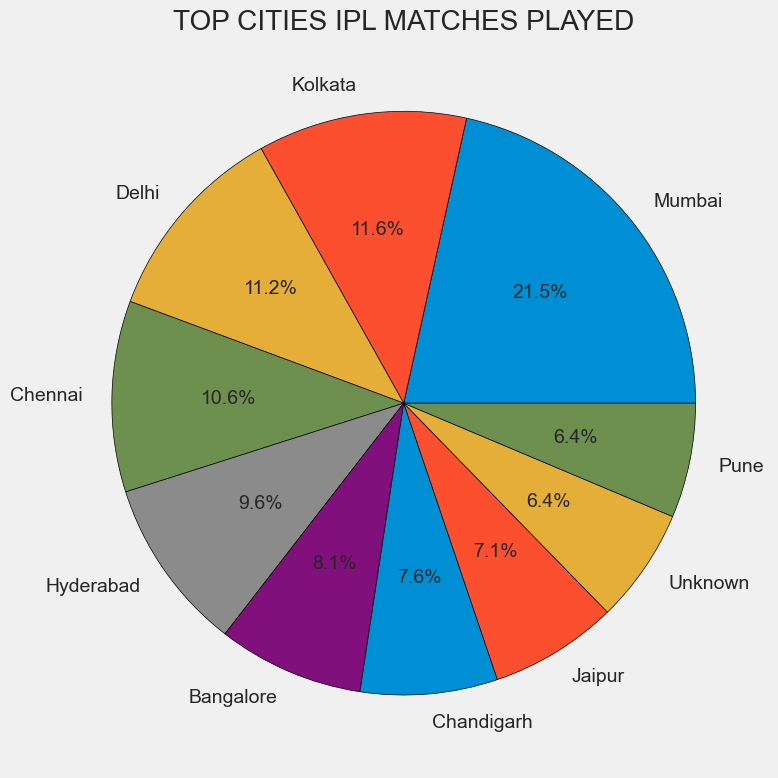

In [68]:
plt.figure(figsize=(8,8))
plt.pie(top_cities_ipl_matches_played['Matches_held'],labels=top_cities_ipl_matches_played['city'],autopct='%1.1f%%',wedgeprops=dict(edgecolor='black'))
plt.title('TOP CITIES IPL MATCHES PLAYED')
plt.tight_layout()
plt.show()

In [70]:
over_summary=deliveries.groupby('over')[['total_runs','is_wicket','extra_runs','batsman_runs']].sum()
over_summary

,total_runs,is_wicket,extra_runs,batsman_runs
over,,,,
0,13651,463,1257,12394
1,16163,503,1266,14897
2,17895,533,961,16934
3,18415,548,905,17510
4,18565,576,812,17753
5,18528,540,887,17641
6,14839,444,804,14035
7,15981,472,721,15260
8,16639,537,724,15915


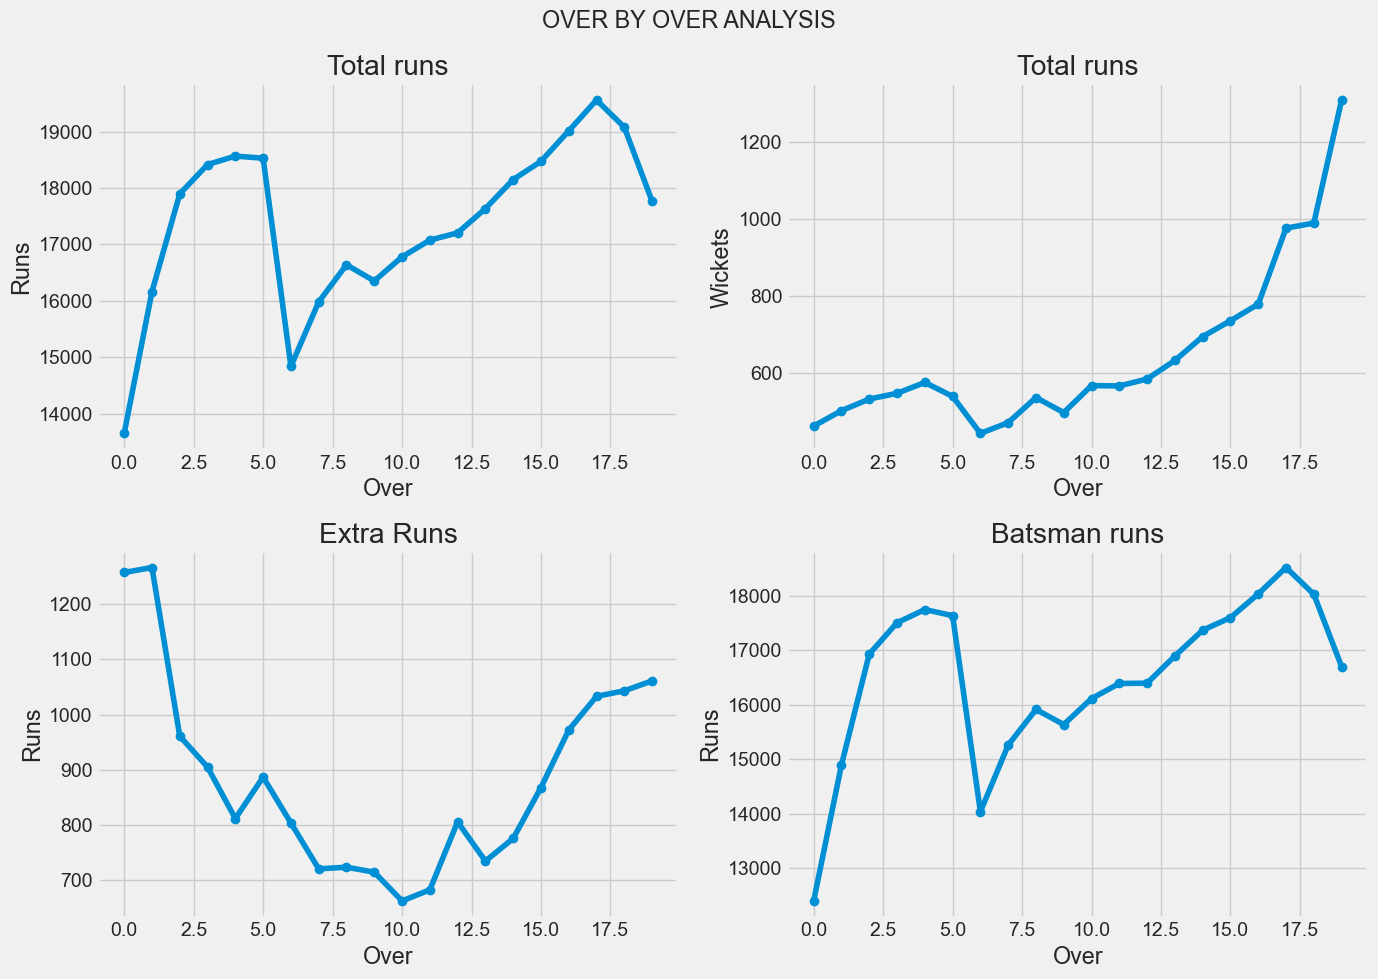

In [75]:
fig,axes=plt.subplots(2,2,figsize=(14,10))
fig.suptitle('OVER BY OVER ANALYSIS')
axes[0,0].plot(over_summary.index,over_summary['total_runs'],marker='o')
axes[0,0].set_title('Total runs')
axes[0,0].set_xlabel('Over')
axes[0,0].set_ylabel('Runs')

axes[0,1].plot(over_summary.index,over_summary['is_wicket'],marker='o')
axes[0,1].set_title('Total runs')
axes[0,1].set_xlabel('Over')
axes[0,1].set_ylabel('Wickets')



axes[1,0].plot(over_summary.index,over_summary['extra_runs'],marker='o')
axes[1,0].set_title('Extra Runs')
axes[1,0].set_xlabel('Over')
axes[1,0].set_ylabel('Runs')

axes[1,1].plot(over_summary.index,over_summary['batsman_runs'],marker='o')
axes[1,1].set_title('Batsman runs')
axes[1,1].set_xlabel('Over')
axes[1,1].set_ylabel('Runs')


plt.tight_layout()
plt.show()